## Estimating Pi with Random Numbers ##
### Variance Reduction with Antithetic and Control Variates ###
#### Jesse Galef



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [2]:
22./7 - np.pi

0.0012644892673496777

In [3]:
n=10000

In [ ]:
def func(u):
    return 4*np.sqrt(1-u**2)

def ci(a, z=1.96):
    return z * (a.std()/(len(a)**.5))

def info(a, actual=None, show=True):
    interval = ci(a)
    if show is True:
        print "simulated mean: ", a.mean()
        if actual is not None:
            print "error: ", abs(a.mean() - actual)
        print "95% confidence interval:", a.mean() - interval, '-', a.mean()+interval
        print "confidence interval size:", interval*2        
    if actual is not None:
        return abs(a.mean() -actual) < interval
    return interval*2

def compare(func=func, u=None, n=1000, getValues=False, show=True):
    if u is None:
        u = np.random.rand(n)
    x = func(u)
    xci = info(x, show=show)
    x2 = func(1.-u)
    combined = (x+x2)/2.
    xci = info(combined, show=show)
    if getValues is True:
        return xci, combined
    return xci

def controlVar(func, cFunc, u=None, eC = (1./3), n=1000, getValues=False, show=True):
    if u is None:
        u = np.random.rand(n)
    x = func(u)
    xv = info(x, show=show)
    
    c = cFunc(u)

    xDifference = x - x.mean()
    cDifference = c - eC
    b = (xDifference*cDifference).sum() / (cDifference**2).sum()
    if show is True:
        print 'b:', b
    x3 = x-(b*(cFunc(u)-eC))
    x3v = info(x3, show=show)
    if getValues is True:
        return x3v, x3, b
    return x3v
    

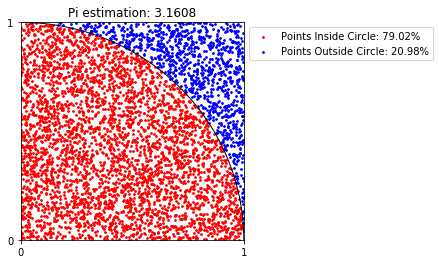

In [1208]:
np.random.seed(0)
plt.figure(figsize=[4,4])
u = np.random.rand(n/2,2)
inCircle = np.array([(x**2 + y**2 < 1) for x,y in u])
cmap = {True: 'red', False: 'blue'}
plt.scatter(u[inCircle][:,0], u[inCircle==True][:,1], color='red', s=3, label='Points Inside Circle: '+str(inCircle.sum()/50.)+'%')
plt.scatter(u[~inCircle][:,0], u[~inCircle][:,1], color='blue', s=3, label='Points Outside Circle: '+str(100-inCircle.sum()/50.)+'%')

ax1 = plt.Circle((0,0),1, fill=False)
plt.gca().add_artist(ax1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([0,1])
plt.yticks([0,1])
plt.title('Pi estimation: '+str(4. * inCircle.mean()))
plt.legend(bbox_to_anchor=[1,1,0,0])
u = u.reshape(-1,1)

In [1160]:
info(inCircle*4)

simulated mean:  3.1608
95% confidence interval: 3.11565576322 3.20594423678
confidence interval size: 0.0902884735579


0.090288473557928753

(0, 4.1)

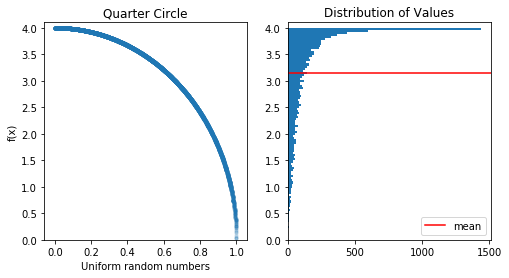

In [1209]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.scatter(u,func(u), s=10, alpha=.1)
plt.xlabel('Uniform random numbers')
plt.ylabel('f(x)')
plt.title('Quarter Circle')
plt.gca().set_ylim([0,4.1])
ax=plt.subplot(1,2,2)
plt.title('Distribution of Values')
# sns.distplot(func(u),bins=100, kde=True, hist=False, kde_kws={'clip':[0,4],}, vertical=True, color='blue', ax=ax)
plt.hist(func(u),bins=100, orientation='horizontal')
plt.axhline(func(u).mean(), color='red', label='mean')
plt.legend(loc='lower right')
plt.gca().set_ylim([0,4.1])

In [1211]:
compare(func, u=u)

simulated mean:  3.15000140762
95% confidence interval: 3.13255696586 - 3.16744584938
confidence interval size: 0.0348888835267
simulated mean:  3.13888633186
95% confidence interval: 3.13234868187 - 3.14542398186
confidence interval size: 0.0130752999837


0.01307529998372543

(0, 4.1)

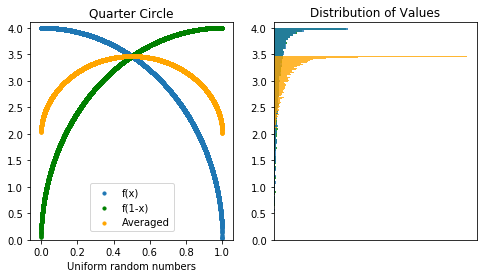

In [1229]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.scatter(u,func(u), label='f(x)', s=10)
plt.scatter(u,func(1-u), label='f(1-x)', s=10, color='green')
plt.scatter(u,(func(u)+func(1-u))/2, s=10, color='orange', label= 'Averaged')
plt.xlabel('Uniform random numbers')
plt.title('Quarter Circle')
plt.gca().set_ylim([0,4.1])
plt.legend(bbox_to_anchor=[.5,.15,0,0], loc='center')
ax=plt.subplot(1,2,2)
plt.title('Distribution of Values')
plt.hist(func(1-u),bins=100, orientation='horizontal', normed=True, alpha=.8, label='f(1-x)', color='green')
plt.hist(func(u),bins=100, orientation='horizontal', normed=True, alpha=.8, label='f(x)')
plt.hist((func(u)+func(1-u))/2, bins=100, orientation='horizontal', normed=True, alpha=.8, label='Averaged', color='orange')
plt.xticks([])
plt.gca().set_ylim([0,4.1])

In [1233]:
better = 0
iterations = 10000
for i in range(iterations):
    approx = compare(func, n=n, getValues=True, show=False)[1].mean()
    if abs(approx-np.pi) < abs(22./7 - np.pi):
        better +=1
print float(better) / iterations
        

0.297


In [1177]:
cvars = controlVar(lambda x: 4*((1-x**2)**.5), lambda u: u**2, u=u, eC=(1./3), getValues=True)

simulated mean:  3.15000140762
95% confidence interval: 3.13255696586 - 3.16744584938
confidence interval size: 0.0348888835267
b: -2.93804069165
simulated mean:  3.14119053186
95% confidence interval: 3.13807669824 - 3.14430436549
confidence interval size: 0.00622766725656


(-1.1, 4.1)

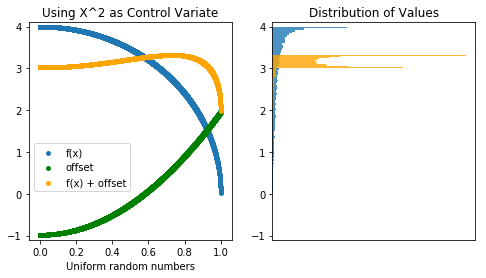

In [1222]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.scatter(u,func(u), label='f(x)', s=15)
plt.scatter(u,-cvars[2]*(u**2-(1./3)), s=15, color='green', label='offset')
plt.scatter(u,cvars[1], label="f(x) + offset", s=15, color='orange')
plt.xlabel('Uniform random numbers')
# plt.ylabel('f(x)')
plt.title('Using X^2 as Control Variate')
plt.legend(bbox_to_anchor=[0,0.2,0,0], loc='lower left')
plt.gca().set_ylim([-1.1,4.1])
ax=plt.subplot(1,2,2)
plt.title('Distribution of Values')
plt.hist(func(u),bins=100, orientation='horizontal', normed=True, alpha=.8, label='f(x)')
plt.hist(cvars[1], bins=100, orientation='horizontal', normed=True, alpha=.8, label='Control Variates', color='orange')
plt.xticks([])
plt.gca().set_ylim([-1.1,4.1])

In [ ]:
better = 0
iterations = 10000
for i in range(iterations):
    approx = controlVar(func, lambda u: u**2, n=n, eC=1./3, show=False, getValues=True)[1].mean()
    if abs(approx-np.pi) < abs(22./7 - np.pi):
        better +=1
print float(better) / iterations
        

In [686]:
df = pd.DataFrame()

In [1179]:
np.random.seed(0)
for i in range(2,9):
    print 10**i
    df.loc[i, 'points'] = info(4*np.array([(x**2 + y**2 < 1) for x,y in np.random.rand((10**i)/2,2)]), show=False)
    df.loc[i, 'simulated'] = info(4*((1-np.random.rand(10**i)**2)**.5), show=False)
    df.loc[i,'antithetic'] = compare(lambda x: 4*((1-x**2)**.5), n=10**i, show=False)
    df.loc[i,'control'] = controlVar(lambda x: 4*((1-x**2)**.5), lambda u: u**2, n=10**i, show=False)

In [1180]:
df

,simulated,antithetic,control,points
2,0.339562,0.134327,0.045766,0.812944
3,0.114020,0.041247,0.017964,0.297758
4,0.035646,0.012947,0.006264,0.089455
5,0.011064,0.004112,0.001997,0.028910
6,0.003498,0.001298,0.000632,0.009113
7,0.001107,0.000411,0.000200,0.002878
8,0.000350,0.000130,0.000063,0.000910


In [1186]:
df.columns = ['Mean', 'Antithetic Variates', 'Control Variates', 'Plotting']

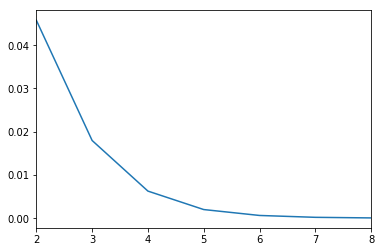

In [1184]:
df['control'].plot()

In [1188]:
22./7 - np.pi

0.0012644892673496777

In [1189]:
df/2.

,Mean,Antithetic Variates,Control Variates,Plotting
2,0.169781,0.067163,0.022883,0.406472
3,0.057010,0.020623,0.008982,0.148879
4,0.017823,0.006473,0.003132,0.044728
5,0.005532,0.002056,0.000998,0.014455
6,0.001749,0.000649,0.000316,0.004557
7,0.000553,0.000205,0.000100,0.001439
8,0.000175,0.000065,0.000032,0.000455


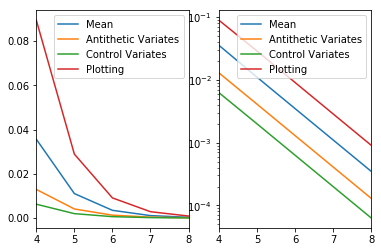

In [1223]:
ax1 = plt.subplot(1,2,1)
df.loc[4:].plot(ax=ax1)
ax2 = plt.subplot(1,2,2)
df.loc[4:].plot(logx=False, logy=True, ax=ax2)